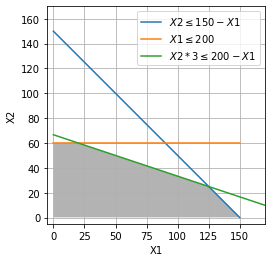

In [2]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Add a grid to the plot
plt.grid()

plt.xlabel('X1')
plt.ylabel('X2')

# Create the first constraint
X1 = np.linspace(0,150)
X2 = 150 - X1

# Create the plot
plt.plot(X1, X2, label = r'$X2 \leq 150 - X1$')
plt.plot(X1, 60*np.ones_like(X2), label = r'$X1 \leq 200 $')

# Create the first constraint
X1 = np.linspace(0,200)
X2 = (200 - X1)/3

# Create the plot
plt.plot(X1, X2, label = r'$X2*3 \leq 200 - X1$')

#plt.plot(X1, 60*np.ones_like(X2), label = r'$X1 \leq 0 $')
#plt.plot(X1, X2, label = r'$X1 \leq 200 - X2$')

#plt.plot(2000*np.ones_like(X1), X2, label=r'$X2 \leq 150$')


# Add the feasible region
d = np.linspace(-5,170,300)
X1,X2 = np.meshgrid(d,d)
plt.imshow( ((X1 >= 0) & (X2 >= 0)  & (X2 <= 60) & (X1 + X2 <= 150)& (X1 + 3*X2 <= 200)).astype(int) , 
                extent=(X1.min(),X1.max(),X2.min(),X2.max()),origin="lower", cmap="Greys", alpha = 0.3);

plt.legend(loc = 1)

In [3]:
# install pyomo, if needed
import shutil
if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))
    
# import the package
import pyomo.environ as pyo

     |████████████████████████████████| 9.1 MB 5.2 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 


In [4]:
import shutil
import os
import sys

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    # this way we discover if we are runing in colab
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
        assert(shutil.which("cbc") or os.path.isfile("cbc"))
        solver = pyo.SolverFactory( 'cbc' )
    else: 
        if os.name == 'nt': # you are running your notebook on Windows
            # get your cbc from https://bintray.com/coin-or/download/Cbc
            # and change the executable location accordingly 
            try:
                solver = pyo.SolverFactory( 'cbc', executable='D:/src/solvers/cbc 2.9/bin/cbc.exe' )
                # only uncomment if you have a (academic?) licensed version of gurobi
                # solver = pyo.SolverFactory( 'gurobi' )
            except:
                pass
        else:
            # we assume the Anaconda Jupyter distribution on Linux of Mac
            try:
                !conda install -c conda-forge coincbc 
            except:
                pass

            assert(shutil.which("cbc") or os.path.isfile("cbc"))
            solver = pyo.SolverFactory( 'cbc' )

Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 148492 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.10.14+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.10.14+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.107.9+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.107.9+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.16.11+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.16.11+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.59.10+repack1-1_amd64.deb ...
Unpacking coinor-libcgl1 (0.59.10+repack1-1) ...
Selecting previously unselected package coinor-libcbc3.
Preparing to unpack .../4-coinor-libcbc3_2.9.9+repack1-1_amd64.deb ...
Unpacking coinor-libcbc3 (2.9.9+repack1-1) ...
Selecting p

In [5]:
def OptimizationModel(price_X1, price_X2, max_X2, solver = solver):

    # Create a model
    model = pyo.ConcreteModel()

    # Add variables which are non-negative and integer
    model.x = pyo.Var([1,2], domain=pyo.NonNegativeIntegers)

    model.OBJ = pyo.Objective(expr = price_X1 * model.x[1] + price_X2 * model.x[2], sense = pyo.maximize)

    model.Constraint1 = pyo.Constraint( expr = model.x[1] + model.x[2] <= 150)
    model.Constraint2 = pyo.Constraint( expr = model.x[1] + model.x[2]*3 <= 200)
  
    model.Constraint3 = pyo.Constraint( expr = model.x[2] <= max_X2)

    results = solver.solve(model)

    return model.OBJ.expr(), model.x[1].value, model.x[2].value

In [6]:
results, X1, X2 = OptimizationModel(1, 2,  60 ) 
print('The optimal solution has ' + str(X1) + ' Product1 and ' + str(X2) + ' Product2 and has a revenue of ' + str(results))

The optimal solution has 125.0 Product1 and 25.0 Product2 and has a revenue of 175.0
